# Dataset selection notebook

we will explore dataset characteristics and properites in the ocntext fo regularized linear regression, we will look for:
+ 1
+ 2

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

### Load dataset

In [6]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

### EDA

In [14]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


all numeric features / no missing values

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


#### Correlation analysis

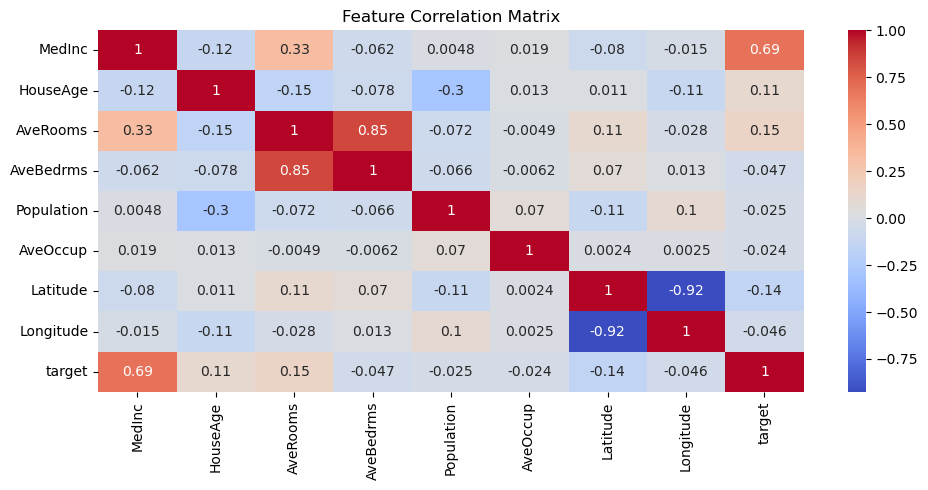

In [38]:
corr_mat = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_mat, cmap="coolwarm", annot = True) # annot: display corr values
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [43]:
print("Highly correlated features (|r| > 0.5):")
def high_corr_pairs(cor_mat:pd.DataFrame):    
    res = []
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i, j]) > 0.5:
                res.append((corr_mat.columns[i], corr_mat.columns[j], corr_mat.iloc[i, j]))
    return res

corr_pairs = high_corr_pairs(corr_mat)
for feat1, feat2, corr in corr_pairs:
    print(f"{feat1} - {feat2}: {corr:.3f}")

Highly correlated features (|r| > 0.5):
AveBedrms - AveRooms: 0.848
Longitude - Latitude: -0.925
target - MedInc: 0.688


observations:

+ Redundance between some feature pairs (regularization can help)
+ MedInc high correlation with target

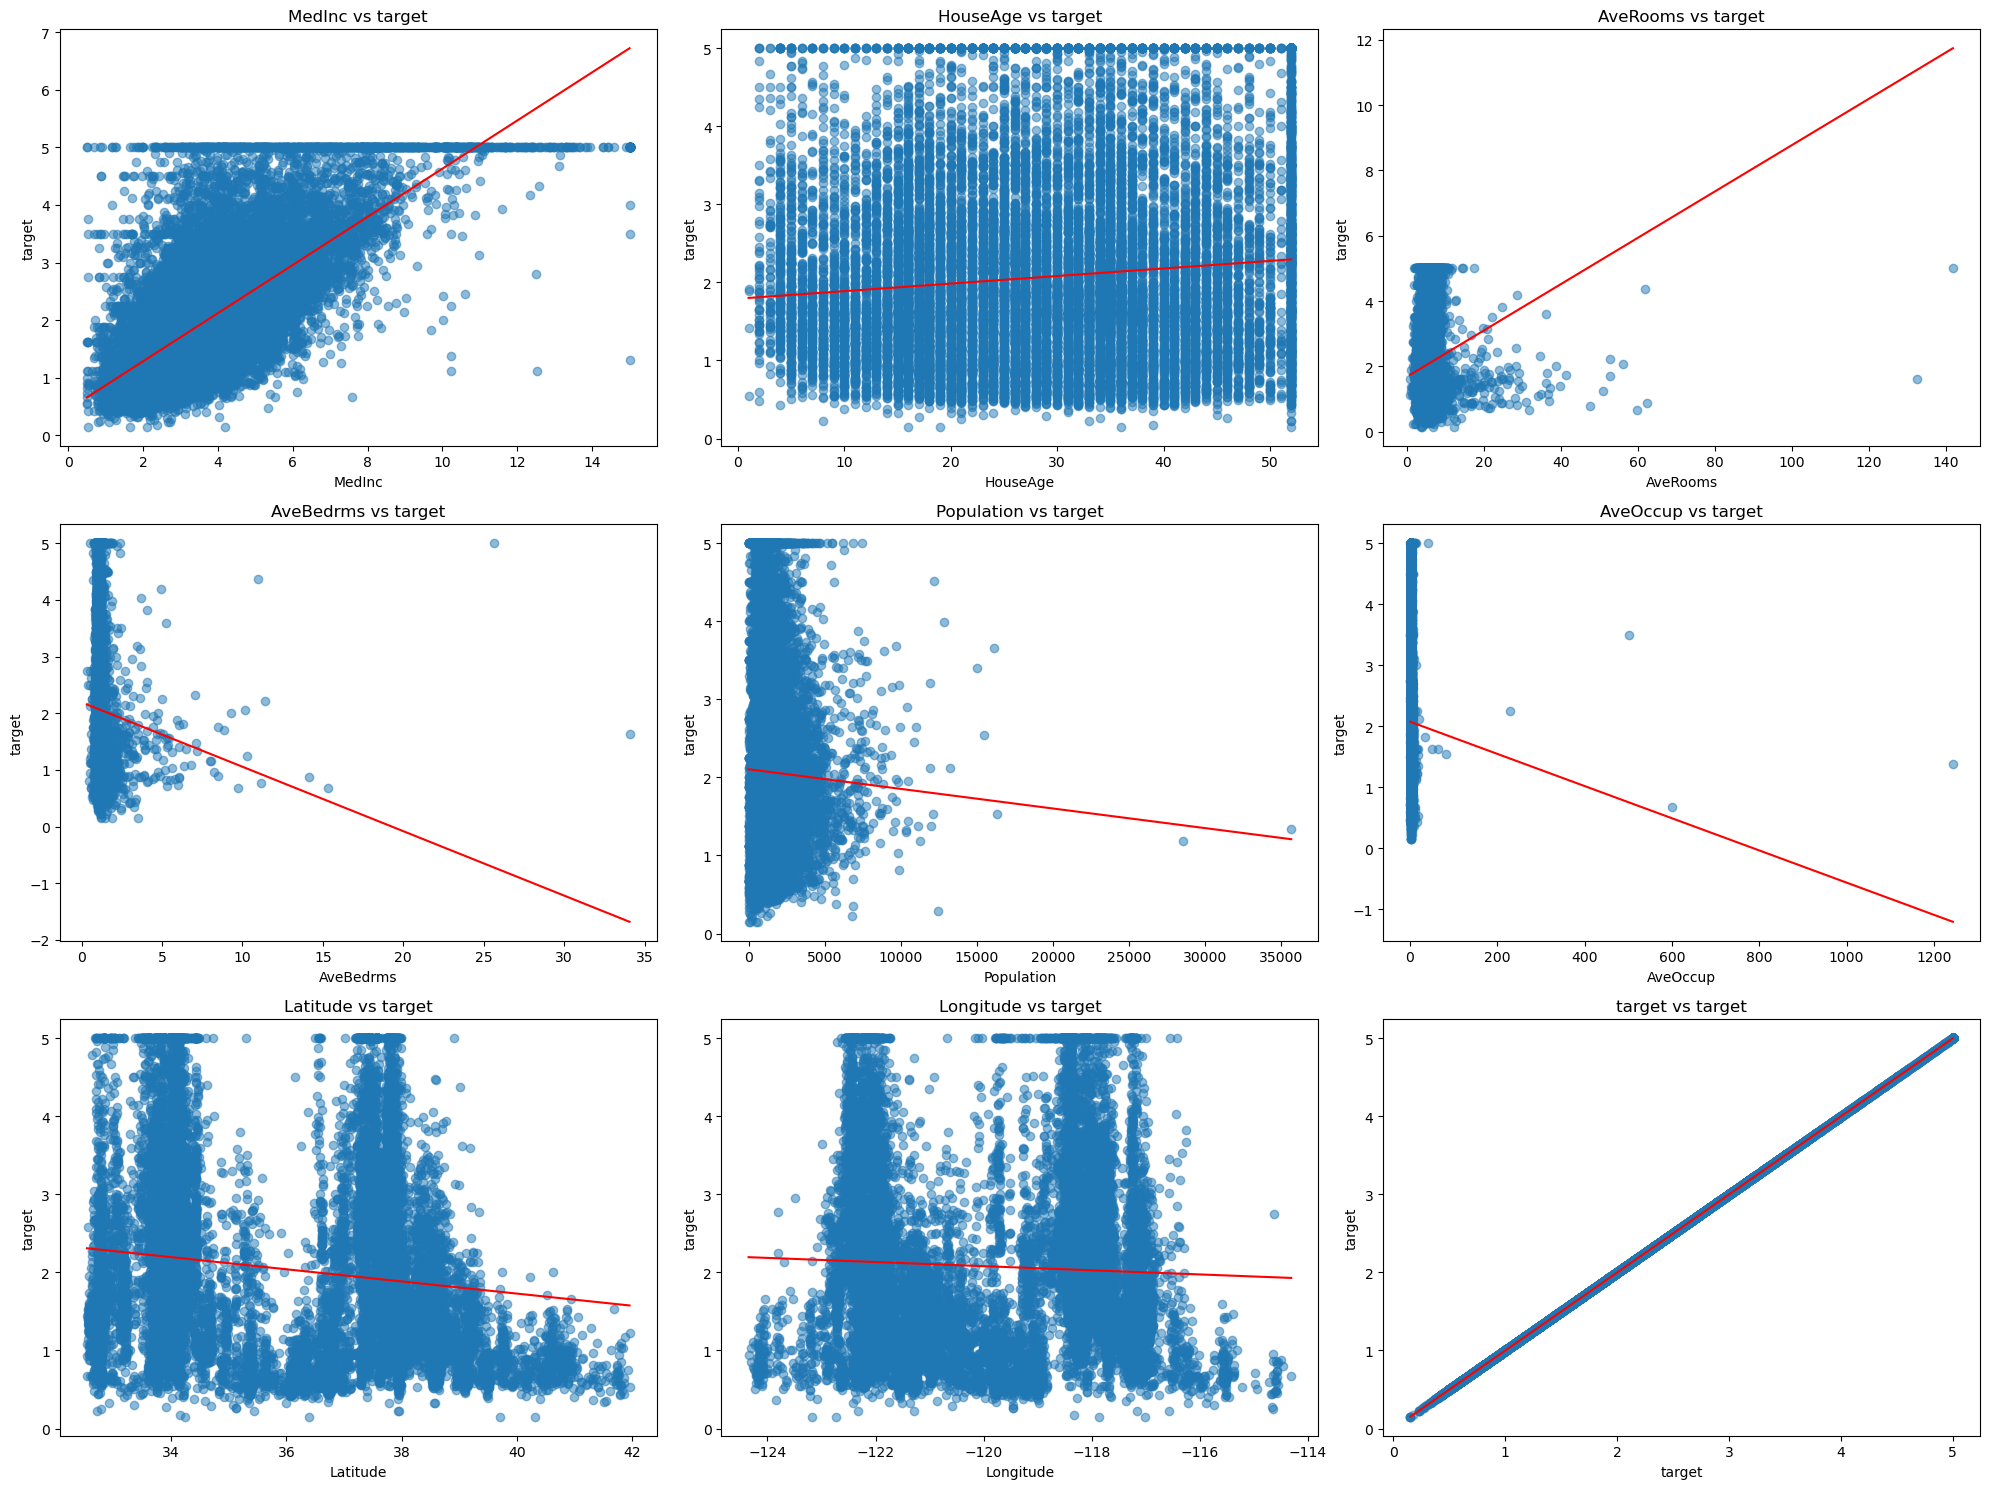

In [51]:
# Create pair plots for features vs target
plt.figure(figsize=(20, 15))
for i, feature in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    plt.scatter(df[feature], df['target'], alpha=0.5)
    plt.title(f"{feature} vs target")
    plt.xlabel(feature)
    plt.ylabel("target")
    
    # Add regression line
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    X = df[feature].values.reshape(-1, 1)
    model.fit(X, df['target'])
    x_range = np.linspace(X.min(), X.max(), 100)
    y_pred = model.predict(x_range.reshape(-1, 1))
    plt.plot(x_range, y_pred, color='red')
    
plt.tight_layout()
plt.show()